In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Kalpataru Group/Steel Price prediction/Stainless_Steel_data.csv",
                    names = ['Date', 'Price'], skiprows=[0,], parse_dates= True, index_col= 'Date')

In [3]:
data

,Price
Date,
2011-01-01,100.700
2011-02-01,101.800
2011-03-01,102.400
2011-04-01,104.000
2011-05-01,104.000
...,...
2023-01-01,195.105
2023-02-01,195.105
2023-03-01,195.105


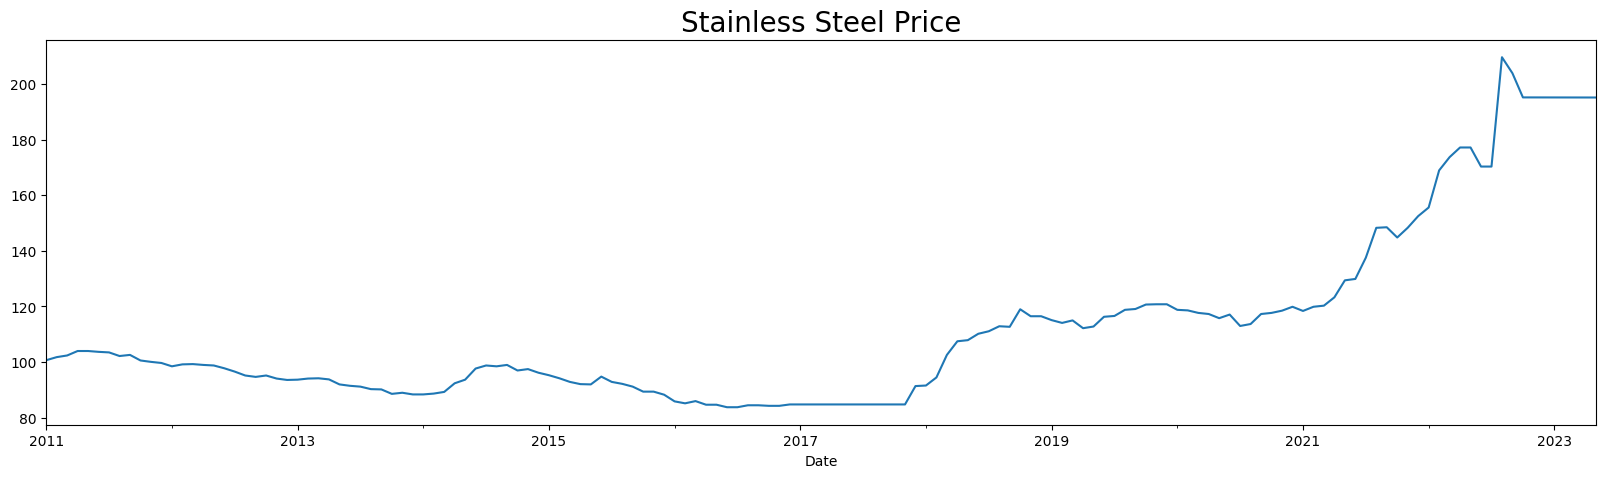

In [4]:
plt.figure(figsize=(20,5))
data.Price.plot()
plt.title("Stainless Steel Price", fontsize = 20)
plt.show()

In [5]:
data[-12:]

,Price
Date,
2022-06-01,170.290
2022-07-01,170.290
2022-08-01,209.582
2022-09-01,203.832
2022-10-01,195.142
2022-11-01,195.142
2022-12-01,195.105
2023-01-01,195.105
2023-02-01,195.105


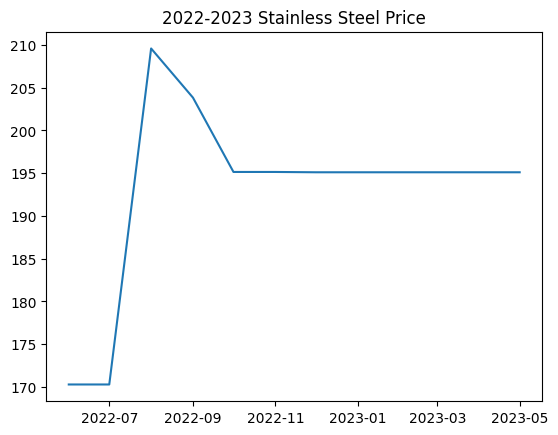

In [6]:
last_year = data[-12:]
plt.plot(last_year)
plt.title("2022-2023 Stainless Steel Price")
plt.show()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

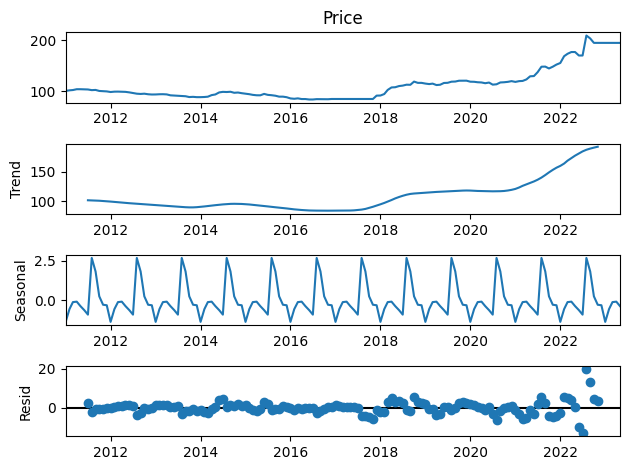

In [8]:
results = seasonal_decompose(data['Price'])
results.plot();

In [9]:
len(data)

149

In [10]:
train = data.iloc[:125]
test = data.iloc[125:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
scaled_train[:5]

array([[0.37061404],
       [0.39473684],
       [0.40789474],
       [0.44298246],
       [0.44298246]])

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [16]:
X, y = generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'predict this y: \n{y}')

Given the array: 
[0.37061404 0.39473684 0.40789474]
predict this y: 
[[0.44298246]]


In [17]:
X.shape

(1, 3, 1)

In [18]:
n_input = 24
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(generator, epochs= 50)

Epoch 1/50
101/101 [==============================] - 7s 32ms/step - loss: 0.0396
Epoch 2/50
101/101 [==============================] - 3s 24ms/step - loss: 0.0153
Epoch 3/50
101/101 [==============================] - 2s 21ms/step - loss: 0.0103
Epoch 4/50
101/101 [==============================] - 2s 23ms/step - loss: 0.0091
Epoch 5/50
101/101 [==============================] - 2s 21ms/step - loss: 0.0072
Epoch 6/50
101/101 [==============================] - 3s 27ms/step - loss: 0.0062
Epoch 7/50
101/101 [==============================] - 2s 24ms/step - loss: 0.0060
Epoch 8/50
101/101 [==============================] - 2s 21ms/step - loss: 0.0041
Epoch 9/50
101/101 [==============================] - 2s 24ms/step - loss: 0.0045
Epoch 10/50
101/101 [==============================] - 2s 24ms/step - loss: 0.0052
Epoch 11/50
101/101 [==============================] - 2s 24ms/step - loss: 0.0043
Epoch 12/50
101/101 [==============================] - 2s 19ms/step - loss: 0.0039
Epoch 13/50
1

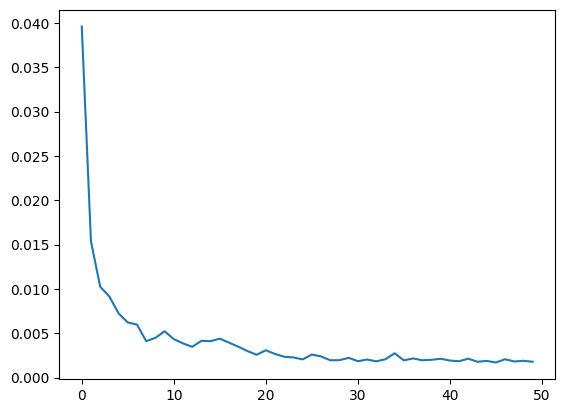

In [23]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch )

In [24]:
last_train_batch = scaled_train[-24:]

In [25]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [26]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 217ms/step


array([[0.98976594]], dtype=float32)

In [27]:
scaled_test[0]

array([1.01096491])

In [28]:
model.predict(last_train_batch)[0]

1/1 [==============================] - 0s 23ms/step


array([0.98976594], dtype=float32)

In [29]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  # get the predictions value for the first batch
  current_prediction = model.predict(current_batch)[0]

  # append the prediction into the array
  test_predictions.append(current_prediction)

  # use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)


1/1 [==============================] - 0s 36ms/step


In [30]:
test_predictions

[array([0.98976594], dtype=float32),
 array([1.0240741], dtype=float32),
 array([1.048916], dtype=float32),
 array([1.0702558], dtype=float32),
 array([1.091158], dtype=float32),
 array([1.1129733], dtype=float32),
 array([1.1360155], dtype=float32),
 array([1.1600416], dtype=float32),
 array([1.18465], dtype=float32),
 array([1.2094929], dtype=float32),
 array([1.2343394], dtype=float32),
 array([1.2590604], dtype=float32),
 array([1.2836], dtype=float32),
 array([1.3079476], dtype=float32),
 array([1.3321137], dtype=float32),
 array([1.3561028], dtype=float32),
 array([1.3799264], dtype=float32),
 array([1.403589], dtype=float32),
 array([1.4271017], dtype=float32),
 array([1.4504681], dtype=float32),
 array([1.4737076], dtype=float32),
 array([1.4967916], dtype=float32),
 array([1.5196774], dtype=float32),
 array([1.542317], dtype=float32)]

In [31]:
true_predictions = scaler.inverse_transform(test_predictions)

In [32]:
test['predictions'] = true_predictions

<ipython-input-32-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [33]:
test

,Price,predictions
Date,,
2021-06-01,129.900,128.933327
2021-07-01,137.539,130.497778
2021-08-01,148.272,131.630569
2021-09-01,148.476,132.603662
2021-10-01,144.798,133.556806
2021-11-01,148.293,134.551584
2021-12-01,152.478,135.602308
2022-01-01,155.572,136.697896
2022-02-01,168.909,137.820037


<Axes: xlabel='Date'>

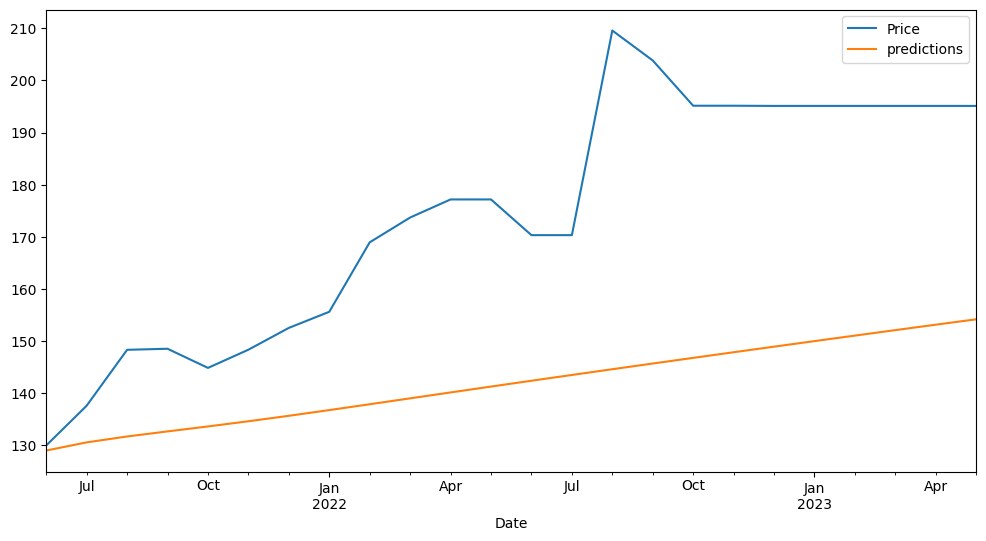

In [34]:
test.plot(figsize=(12,6))

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['Price'], test['predictions']))
print(rmse)

36.22565933835853


In [36]:
# when n_input = 12, rmse = 113
# when n_input = 48, rmse = 61

In [37]:
# exluding last year data

In [38]:
new_data= data[:137]
new_train = new_data[:125]
new_test = new_data[125:]

In [39]:
new_data.shape

(137, 1)

In [40]:
scaler.fit(train)
new_scaled_train = scaler.transform(new_train)
new_scaled_test = scaler.transform(new_test)

In [41]:
n_input = 12
generator = TimeseriesGenerator(new_scaled_train, new_scaled_train, length=n_input, batch_size=1)

In [42]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(generator, epochs= 50)

Epoch 1/50
113/113 [==============================] - 3s 7ms/step - loss: 0.0318
Epoch 2/50
113/113 [==============================] - 1s 8ms/step - loss: 0.0136
Epoch 3/50
113/113 [==============================] - 1s 8ms/step - loss: 0.0097
Epoch 4/50
113/113 [==============================] - 1s 7ms/step - loss: 0.0073
Epoch 5/50
113/113 [==============================] - 1s 7ms/step - loss: 0.0077
Epoch 6/50
113/113 [==============================] - 1s 7ms/step - loss: 0.0062
Epoch 7/50
113/113 [==============================] - 1s 7ms/step - loss: 0.0043
Epoch 8/50
113/113 [==============================] - 1s 7ms/step - loss: 0.0037
Epoch 9/50
113/113 [==============================] - 1s 9ms/step - loss: 0.0042
Epoch 10/50
113/113 [==============================] - 1s 11ms/step - loss: 0.0037
Epoch 11/50
113/113 [==============================] - 1s 7ms/step - loss: 0.0031
Epoch 12/50
113/113 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 13/50
113/113 [===

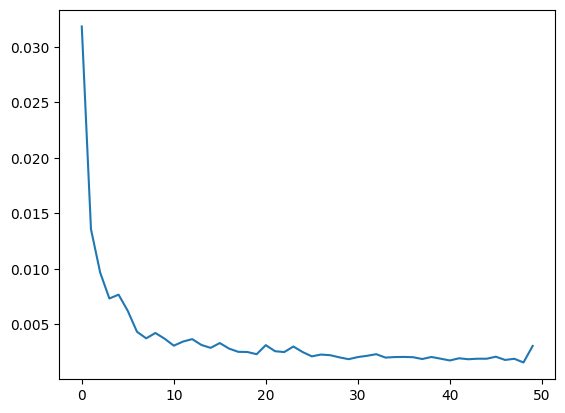

In [45]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch )

In [46]:
new_test_predictions = []

first_eval_batch = new_scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(new_test)):
  # get the predictions value for the first batch
  current_prediction = model.predict(current_batch)[0]

  # append the prediction into the array
  new_test_predictions.append(current_prediction)

  # use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)


1/1 [==============================] - 0s 32ms/step


In [47]:
new_test_predictions

[array([0.9968544], dtype=float32),
 array([1.0408995], dtype=float32),
 array([1.0833772], dtype=float32),
 array([1.1258992], dtype=float32),
 array([1.1709634], dtype=float32),
 array([1.2204467], dtype=float32),
 array([1.2746905], dtype=float32),
 array([1.334636], dtype=float32),
 array([1.4018481], dtype=float32),
 array([1.4772401], dtype=float32),
 array([1.5629102], dtype=float32),
 array([1.659684], dtype=float32)]

In [48]:
new_true_predictions = scaler.inverse_transform(new_test_predictions)

In [49]:
new_true_predictions

array([[129.25656176],
       [131.26501789],
       [133.20200224],
       [135.14100332],
       [137.19593134],
       [139.45236979],
       [141.9258872 ],
       [144.65940037],
       [147.72427235],
       [151.1621479 ],
       [155.06870508],
       [159.48158779]])

In [50]:
new_test['predictions'] = new_true_predictions

<ipython-input-50-9e18777bd72e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['predictions'] = new_true_predictions


In [51]:
new_test

,Price,predictions
Date,,
2021-06-01,129.900,129.256562
2021-07-01,137.539,131.265018
2021-08-01,148.272,133.202002
2021-09-01,148.476,135.141003
2021-10-01,144.798,137.195931
2021-11-01,148.293,139.452370
2021-12-01,152.478,141.925887
2022-01-01,155.572,144.659400
2022-02-01,168.909,147.724272


<Axes: xlabel='Date'>

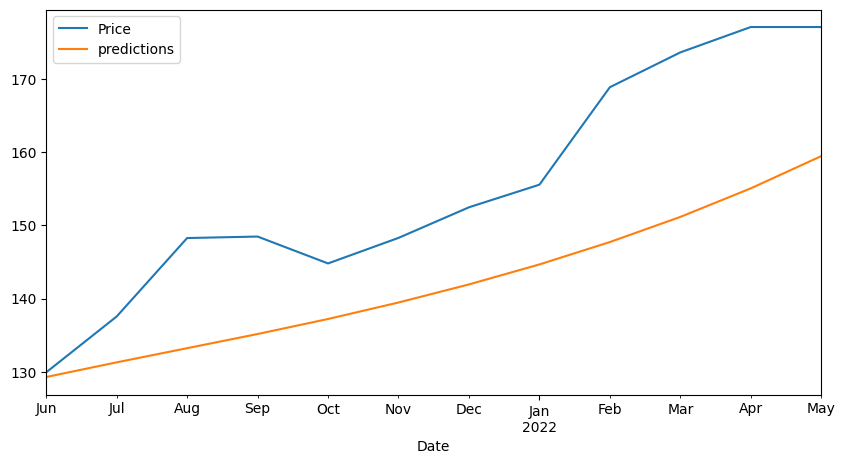

In [52]:
new_test.plot(figsize=(10,5))

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(new_test['Price'], new_test['predictions']))
print(rmse)

14.622967137705189
